In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib.colors import ListedColormap

In [3]:
[[random.randint(1, 400) for _ in range(2)] for _ in range(50)]

[[312, 35],
 [203, 335],
 [120, 169],
 [267, 235],
 [42, 336],
 [287, 315],
 [233, 369],
 [183, 2],
 [138, 257],
 [83, 74],
 [355, 260],
 [132, 229],
 [41, 49],
 [192, 321],
 [69, 51],
 [334, 176],
 [396, 43],
 [391, 186],
 [326, 233],
 [88, 132],
 [146, 366],
 [185, 191],
 [108, 374],
 [278, 331],
 [284, 223],
 [184, 125],
 [54, 284],
 [214, 27],
 [158, 276],
 [367, 353],
 [281, 355],
 [229, 192],
 [309, 307],
 [209, 74],
 [337, 201],
 [134, 380],
 [341, 24],
 [23, 386],
 [80, 147],
 [303, 66],
 [225, 139],
 [119, 173],
 [296, 378],
 [173, 145],
 [47, 188],
 [296, 329],
 [350, 104],
 [395, 189],
 [248, 275],
 [273, 46]]

In [4]:
data_1 = np.array([[random.randint(1, 400) for _ in range(2)] for _ in range(50)], dtype=np.float64)
data_2 = np.array([[random.randint(300, 700) for _ in range(2)] for _ in range(50)], dtype=np.float64)
data_3 = np.array([[random.randint(600, 900) for _ in range(2)] for _ in range(50)], dtype=np.float64)

In [5]:
data = np.vstack((data_1, data_2, data_3))

In [6]:
data.shape

(150, 2)

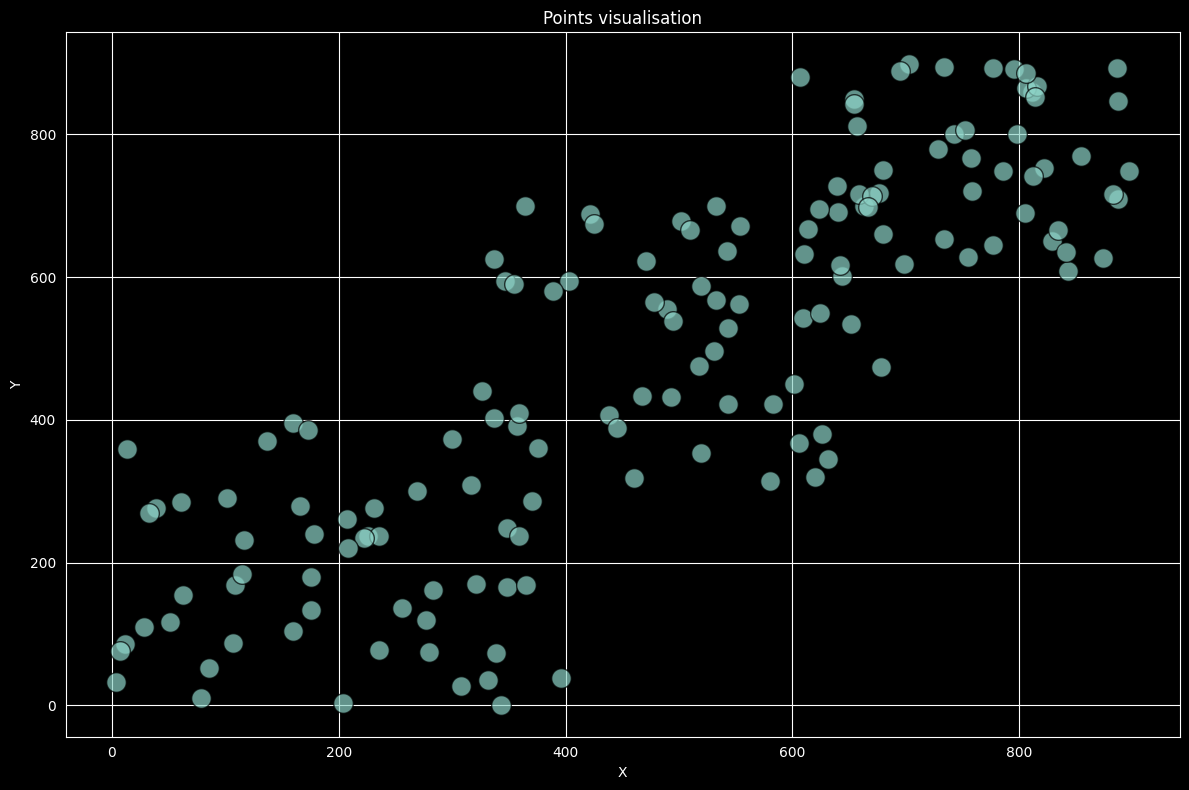

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(data[:, 0], data[:, 1], s=200, alpha=0.7, edgecolors='k')
ax.set_title('Points visualisation')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()

plt.show()

In [8]:
labels = np.repeat([0, 1, 2], repeats=50)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
labels.shape

(150,)

In [10]:
df = pd.DataFrame({
    'data_x': data[:, 0],
    'data_y': data[:, 1],
    'label': labels
})
df.sample(10)

,data_x,data_y,label
104,777.0,645.0,2
37,176.0,180.0,0
53,347.0,595.0,1
29,109.0,168.0,0
12,28.0,110.0,0
40,51.0,117.0,0
125,834.0,666.0,2
76,460.0,318.0,1
81,531.0,496.0,1
80,495.0,538.0,1


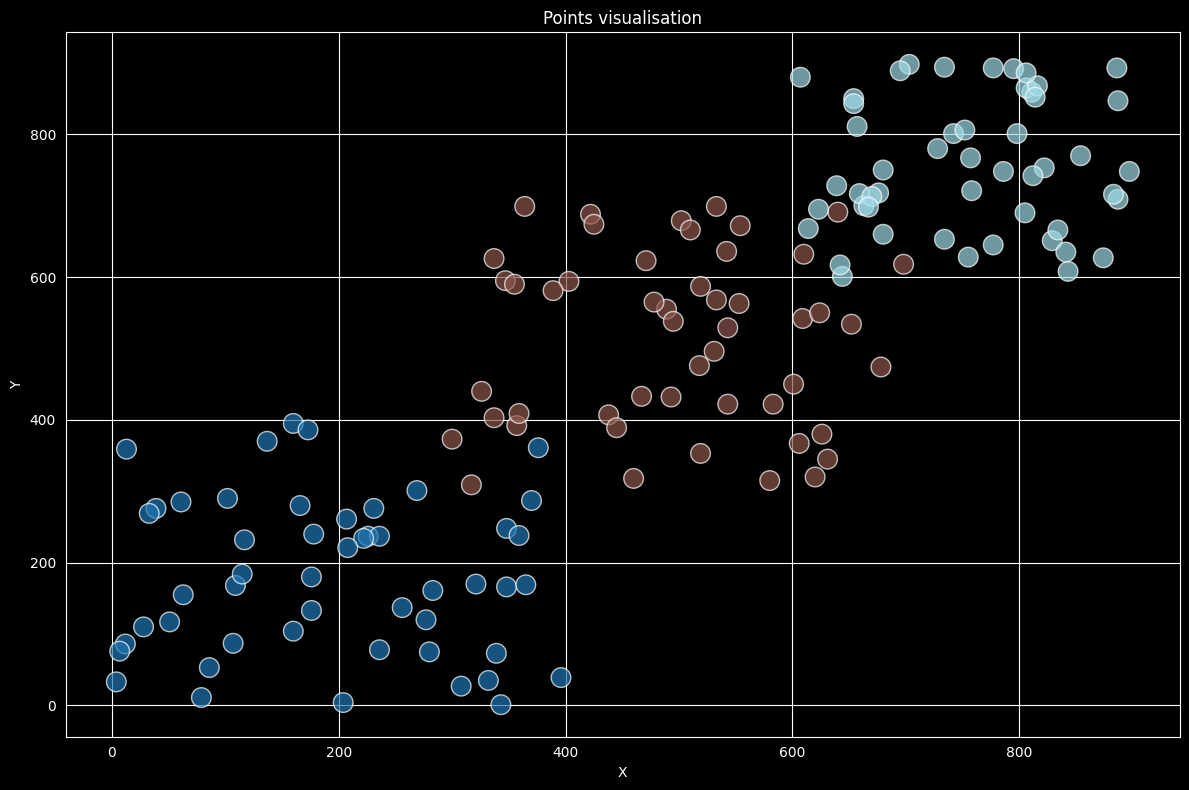

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

# colors = ['green', 'blue', 'purple']

ax.scatter(df['data_x'], df['data_y'], s=200, alpha=0.7, edgecolors='w', c=df['label'], cmap='tab20')
ax.set_title('Points visualisation')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()

plt.show()

In [14]:
model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [15]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [16]:
centroids = model.cluster_centers_

In [17]:
centroids

array([[502.83673469, 514.42857143],
       [194.76470588, 183.45098039],
       [755.58      , 758.82      ]])

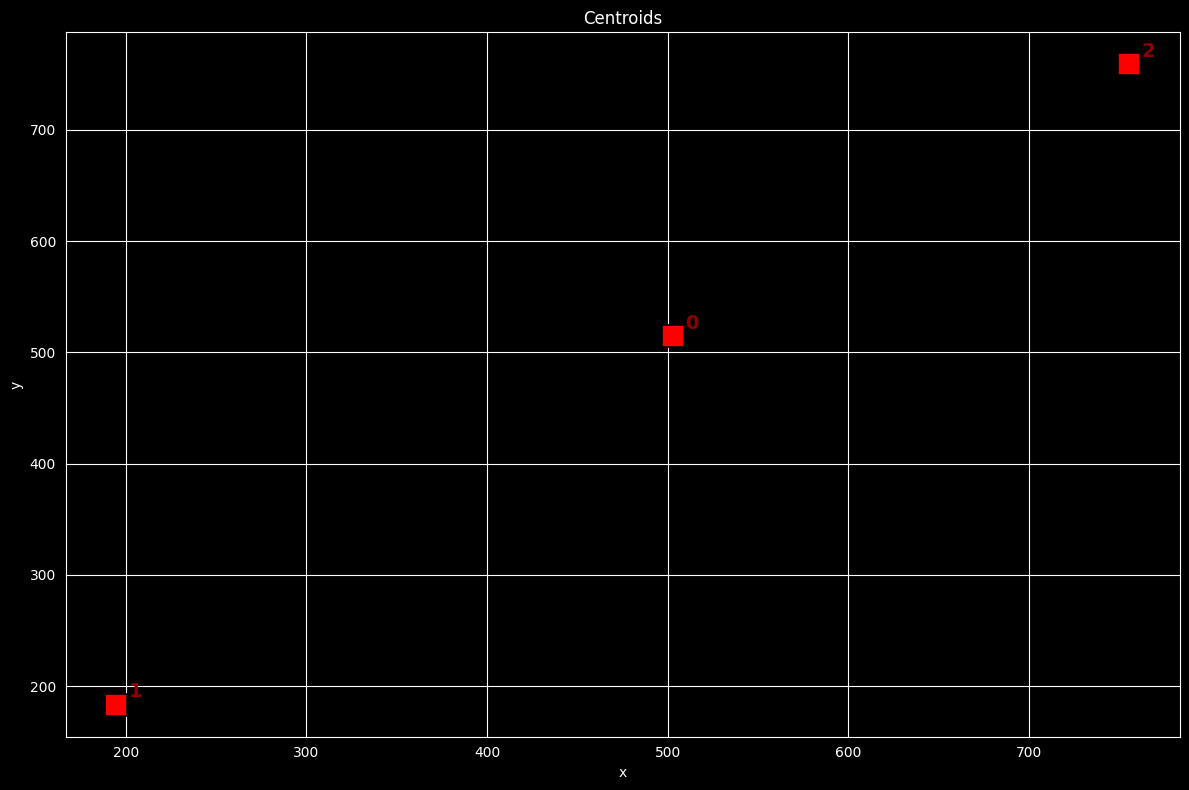

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))


ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=250, marker='s', edgecolors='black', linewidth=1.2, label='Centroids')

for i, (x, y) in enumerate(centroids):
    ax.annotate(
        str(i),
        (x + 7, y + 7),
        fontsize=14,
        fontweight='bold',
        color='darkred'
    )

ax.set_title('Centroids')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()

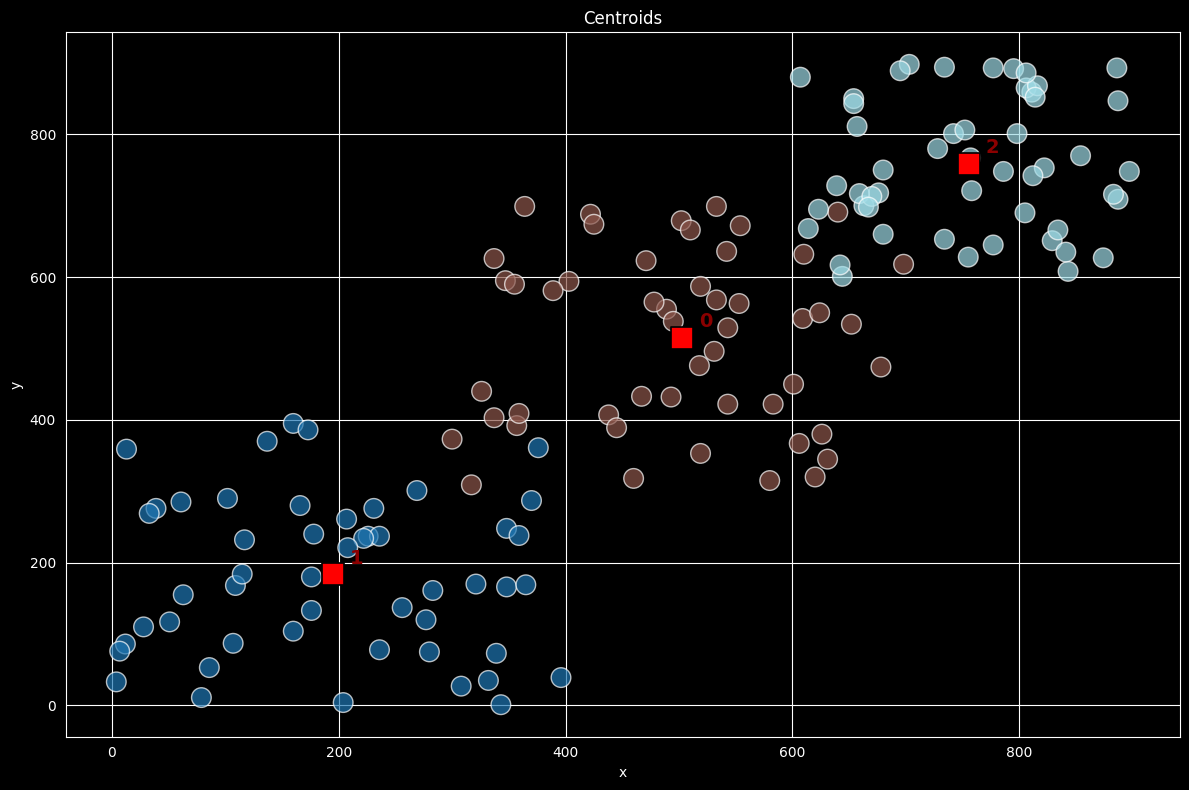

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df['data_x'], df['data_y'], s=200, alpha=0.7, edgecolors='w', c=df['label'], cmap='tab20')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=250, marker='s', edgecolors='black', linewidth=1.2, label='Centroids')

for i, (x, y) in enumerate(centroids):
    ax.annotate(
        str(i),
        (x + 15, y + 15),
        fontsize=14,
        fontweight='bold',
        color='darkred'
    )

ax.set_title('Centroids')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()

In [24]:
# Does each one cluster contain samples from one class
metrics.homogeneity_score(df['label'], model.labels_)

0.8177687615266112

In [27]:
# Do all samples from the same class got in the cluster
metrics.completeness_score(df['label'], model.labels_)

0.8178680288866658

In [29]:
# Harmonic mean between homogeneity and completeness
metrics.v_measure_score(df['label'], model.labels_)

0.8178183921943534

In [30]:
# Comparing pairs of samples
metrics.adjusted_rand_score(df['label'], model.labels_)

0.8647944156255825

In [31]:
# This metrics measures how many shared information labels actual and predict have
metrics.adjusted_mutual_info_score(df['label'], model.labels_)

0.8155382725056468

In [34]:
# Assessment clusters' shape
metrics.silhouette_score(data, model.labels_)

0.5040106244150916

In [35]:
data_test = np.array([[442., 621.],
                      [50., 153.],
                      [333., 373.],
                      [835., 816.]
])

In [36]:
label_predict = model.predict(data_test)

In [37]:
label_predict

array([0, 1, 0, 2], dtype=int32)

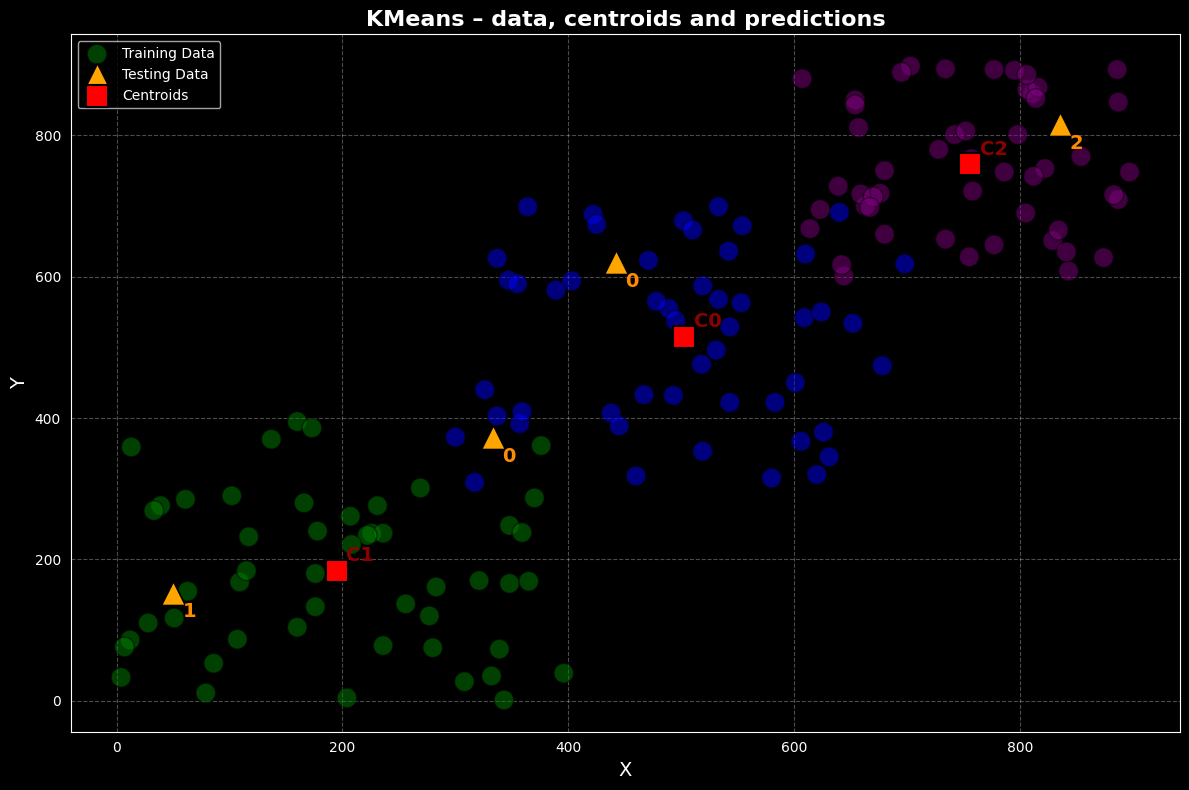

In [39]:
colors = ['green', 'blue', 'purple']
cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(12, 8))

scatter_train = ax.scatter(
    df['data_x'],
    df['data_y'],
    c=df['label'],
    cmap=cmap,
    s=200,
    alpha=0.5,
    edgecolor='k',
    label='Training Data'
)

scatter_test = ax.scatter(
    data_test[:, 0],
    data_test[:, 1],
    c='orange',
    s=300,
    marker='^',
    edgecolor='black',
    linewidth=1.2,
    label='Testing Data'
)

for i, (x, y) in enumerate(data_test):
    ax.annotate(
        str(label_predict[i]),
        xy=(x, y),
        xytext=(7, -7),
        textcoords='offset points',
        fontsize=14,
        fontweight='bold',
        color='darkorange',
        ha='left',
        va='top'
    )

scatter_centroids = ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=250,
    marker='s',
    edgecolor='black',
    linewidth=1.5,
    label='Centroids'
)

for i, (x, y) in enumerate(centroids):
    ax.annotate(
        f"C{i}",
        xy=(x, y),
        xytext=(7, 7),
        textcoords='offset points',
        fontsize=14,
        fontweight='bold',
        color='darkred'
    )

ax.set_title("KMeans – data, centroids and predictions", fontsize=16, fontweight="bold")
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()